In [196]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
%cd drive/MyDrive/CS760/hw4/

/content/drive/MyDrive/CS760/hw4


In [ ]:
import os, sys, tarfile

In [ ]:
tar = tarfile.open('languageID.tgz', 'r')

In [ ]:
# unpack tar file
for item in tar:
    tar.extract(item, '.')
    if item.name.find(".tgz") != -1 or item.name.find(".tar") != -1:
        extract(item.name, "./" + item.name[:item.name.rfind('/')])
try:

    extract(sys.argv[1] + '.tgz')

except:
    name = os.path.basename(sys.argv[0])
    print(name)

ipykernel_launcher.py


# 4

In [5]:
# initalize alphabet and space list
chars = [' ']
alpha = 'a'
dict_temp = {' ': 0}
for i in range(0, 26):
    chars.append(alpha)
    dict_temp[alpha] = 0
    alpha = chr(ord(alpha) + 1)


In [6]:
def preprocess(file, chars):
  with open(file) as f:
    s = "".join(f.read().split('\n'))

  features = []
  for c in chars:
    features.append(s.count(c))
  return np.array(features)

In [7]:
# open files
starter = np.arange(0,10)

# spanish
features_spanish = np.zeros((27,))
n_spanish = 0
for i in starter:
  print('languageID/s' + str(i) +'.txt')
  features_spanish += preprocess('languageID/s' + str(i) +'.txt', chars)
  n_spanish += 1 # index sample count

languageID/s0.txt
languageID/s1.txt
languageID/s2.txt
languageID/s3.txt
languageID/s4.txt
languageID/s5.txt
languageID/s6.txt
languageID/s7.txt
languageID/s8.txt
languageID/s9.txt


In [8]:
# open files
starter = np.arange(0,10)

# english
features_english = np.zeros((27,))
n_english = 0
for i in starter:
  features_english += preprocess('languageID/e' + str(i) +'.txt', chars)
  n_english += 1 # index sample count

In [14]:
features_english

array([2712.,  910.,  168.,  325.,  332., 1594.,  286.,  264.,  714.,
        838.,   21.,   56.,  438.,  310.,  876.,  975.,  253.,    8.,
        814., 1001., 1212.,  403.,  140.,  234.,   17.,  209.,    9.])

In [10]:
sum(features_english)

15119.0

In [15]:
# open files
starter = np.arange(0,10)

# japanese
features_japanese = np.zeros((27,))
n_japanese = 0
for i in starter:
  features_japanese += preprocess('languageID/j' + str(i) +'.txt', chars)
  n_japanese += 1 # index sample count

In [16]:
def prior(n, n_lang):
  '''
  n = total number of characters
  dictionary1 is the language to be evaluated
  '''
  alpha = 1/2
  KL = 3
    
  p = (n_lang + alpha)/(n + KL*alpha)
  return p  

In [17]:
 n_spanish, n_japanese, n_english

(10, 10, 10)

In [18]:
n_total = n_spanish+n_japanese+n_english

In [19]:
prior_english = prior(n_total, n_english)

In [20]:
prior_english

0.3333333333333333

In [21]:
prior_spanish = prior(n_total, n_spanish)

In [22]:
prior_spanish

0.3333333333333333

In [23]:
prior_japanese = prior(n_total, n_japanese)

In [24]:
prior_japanese

0.3333333333333333

In [25]:
prior_japanese + prior_english + prior_spanish

1.0

## 4.2

https://www.youtube.com/watch?v=j1uBHvL6Yr0

In [26]:
features_total = features_english + features_spanish + features_japanese

In [27]:
features_english

array([2712.,  910.,  168.,  325.,  332., 1594.,  286.,  264.,  714.,
        838.,   21.,   56.,  438.,  310.,  876.,  975.,  253.,    8.,
        814., 1001., 1212.,  403.,  140.,  234.,   17.,  209.,    9.])

In [28]:
theta_english = []
sum_d = sum(features_english)
for c in features_english:
  alpha = 1/2
  theta_english.append((c + alpha)/(sum_d + 27 * alpha))

In [29]:
theta_spanish = []
sum_d = sum(features_spanish)
for c in features_spanish:
  alpha = 1/2
  theta_spanish.append((c + alpha)/(sum_d + 27 * alpha))

In [30]:
theta_japanese = []
sum_d = sum(features_japanese)
for c in features_japanese:
  alpha = 1/2
  theta_japanese.append((c + alpha)/(sum_d + 27 * alpha))

In [31]:
theta_english

[0.1792499586981662,
 0.0601685114819098,
 0.011134974392863043,
 0.021509995043779945,
 0.021972575582355856,
 0.1053692383941847,
 0.018932760614571286,
 0.017478936064761277,
 0.047216256401784236,
 0.055410540227986124,
 0.001420783082768875,
 0.0037336857756484387,
 0.028977366595076822,
 0.020518751032545846,
 0.057921691723112505,
 0.06446390219725756,
 0.01675202378985627,
 0.0005617049396993227,
 0.053824549810011564,
 0.06618205848339666,
 0.08012555757475633,
 0.026664463902197257,
 0.009284652238559392,
 0.015496448042293078,
 0.001156451346439782,
 0.013844374690236246,
 0.0006277878737815959]

In [32]:
theta_spanish

[0.16826493170115014,
 0.10456045141993771,
 0.008232863618143134,
 0.03752582405722919,
 0.039745922111559924,
 0.1138108599796491,
 0.00860287996053159,
 0.0071844839813758445,
 0.0045327001942585795,
 0.049859702136844375,
 0.006629459467793161,
 0.0002775122567913416,
 0.052943171656748174,
 0.02580863988159477,
 0.054176559464709693,
 0.07249236841293824,
 0.02426690512164287,
 0.007677839104560451,
 0.05929511886774999,
 0.06577040485954797,
 0.03561407295488884,
 0.03370232185254849,
 0.00588942678301625,
 9.250408559711388e-05,
 0.0024976103111220747,
 0.007862847275754679,
 0.0026826184823163022]

In [33]:
theta_japanese

[0.12344945665466997,
 0.1317656102589189,
 0.010866906600510151,
 0.005485866033054963,
 0.01722631818022992,
 0.06020475907613823,
 0.003878542227191726,
 0.014011670568503443,
 0.03176211607673224,
 0.09703343932352633,
 0.0023411020650616725,
 0.05740941332681086,
 0.001432614696530277,
 0.03979873510604843,
 0.05671057688947902,
 0.09116321324993885,
 0.0008735455466648031,
 0.00010482546559977637,
 0.04280373178657535,
 0.0421747789929767,
 0.056990111464411755,
 0.07061742199238269,
 0.0002445927530661449,
 0.01974212935462455,
 3.4941821866592126e-05,
 0.01415143785596981,
 0.00772214263251686]

In [34]:
sum(np.array(theta_english))

1.0

## 4.3

In [35]:
features_e10 = preprocess('languageID/e10.txt', chars)

In [36]:
len(features_e10)

27

In [37]:
features_e10

array([498, 164,  32,  53,  57, 311,  55,  51, 140, 140,   3,   6,  85,
        64, 139, 182,  53,   3, 141, 186, 225,  65,  31,  47,   4,  38,
         2])

## 4.4

In [41]:
def pred(priors, thetas, features):
  pre_e = np.log(priors[0]) + np.sum(np.multiply(np.log(thetas[0]), features))
  pre_s = np.log(priors[1]) + np.sum(np.multiply(np.log(thetas[1]), features))
  pre_j = np.log(priors[2]) + np.sum(np.multiply(np.log(thetas[2]), features))
  preds = [pre_e, pre_s, pre_j]
  max_value = max(preds)
  max_index = preds.index(max_value)

  return max_index

In [42]:
pred([prior_english, prior_spanish, prior_japanese], [theta_english, theta_spanish, theta_japanese], features_e10)

0

In [43]:
pred_english = np.log(prior_english) + np.sum(np.multiply(np.log(theta_english), features_e10))

In [44]:
pred_spanish = np.log(prior_spanish) + np.sum(np.multiply(np.log(theta_spanish), features_e10))

In [45]:
pred_japanese = np.log(prior_japanese) + np.sum(np.multiply(np.log(theta_japanese), features_e10))

In [46]:
pred_english, pred_spanish, pred_japanese

(-7842.964059349303, -8468.380656299225, -8772.531691363702)

In [54]:
np.exp(pred_english)

0.0

In [49]:
p_e = np.exp(pred_english)/(np.exp(pred_english) + np.exp(pred_spanish) + np.exp(pred_japanese))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


In [52]:
pred_english/(pred_english + pred_spanish + pred_japanese)

0.3126695384751933

In [53]:
pred_spanish/(pred_english + pred_spanish + pred_japanese)

0.3376025506939541

## 4.7

In [55]:
np.arange(10,20)

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [56]:
nums = np.arange(10,20)
langs = ['e', 's', 'j']
test_files = []
for n in nums:
  for l in langs:
    test_files.append(l + str(n))

In [57]:
test_files

['e10',
 's10',
 'j10',
 'e11',
 's11',
 'j11',
 'e12',
 's12',
 'j12',
 'e13',
 's13',
 'j13',
 'e14',
 's14',
 'j14',
 'e15',
 's15',
 'j15',
 'e16',
 's16',
 'j16',
 'e17',
 's17',
 'j17',
 'e18',
 's18',
 'j18',
 'e19',
 's19',
 'j19']

In [58]:
pred_dic = {'e': 0, 's':1, 'j':2}

In [59]:
y = []
feats = []
for t in test_files:
  feats.append(preprocess('languageID/' + t +'.txt', chars))
  y.append(pred_dic[t[0]])

In [60]:
preds = []
for f in feats:
  preds.append(pred([prior_english, prior_spanish, prior_japanese], [theta_english, theta_spanish, theta_japanese], f))

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
confusion_matrix(y, preds)

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]])

# 5

https://medium.com/analytics-vidhya/logistic-regression-with-gradient-descent-explained-machine-learning-a9a12b38d710

https://nextjournal.com/gkoehler/pytorch-mnist
https://www.kaggle.com/justuser/mnist-with-pytorch-fully-connected-network

https://towardsdatascience.com/multi-layer-neural-networks-with-sigmoid-function-deep-learning-for-rookies-2-bf464f09eb7f

https://machinelearningmastery.com/implement-backpropagation-algorithm-scratch-python/

https://stackabuse.com/creating-a-neural-network-from-scratch-in-python-multi-class-classification/

In [93]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

In [94]:
n_epochs = 30
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [95]:
# load data with train batch size = 64
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [96]:
input_size = 28*28 # flatten pixels into 1-dimensional array
output_size = 10 # 10 digit predictions
hidden_size1 = 300
hidden_size2 = 200

In [97]:
# check some sample data shapes
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
example_data.shape

torch.Size([1000, 1, 28, 28])

In [108]:
targets_arr = example_targets.cpu().detach().numpy()

## Manual

In [244]:
def sigmoid(x):
  x = np.clip(x, -10, 0.5)
  return 1 / (1 + np.exp(-x) +  1e-10)

In [227]:
def softmax(x):
  return np.exp(x)/sum(np.exp(x))

In [228]:
def sigmoid_der(x):
    return sigmoid(x) *(1-sigmoid (x))

In [229]:
# forward
def forward(x, w1, b1, w2, b2, w3, b3):
  z1 = np.matmul(x, w1) + b1
  a1 = sigmoid(z1)
  z2 = np.matmul(a1, w2) + b2
  a2 = sigmoid(z2)
  z3 = np.matmul(a2, w3) + b3
  a3 = softmax(z3)
  return z1, a1, z2, a2, z3, a3

In [202]:
def backprop(y_hat, y_true, w1,b1, w2, b2, w3, b3, a1, a2, z1, z2, x, lr):


  # layer 3
  dcost_dz3 = y_hat - y_true
  dz3_dw3 = a2
  dcost_w3 = np.dot(dz3_dw3.T, dcost_dz3)
  dcost_b3 = dcost_dz3
  
  # layer 2
  dz3_da2 = w3
  dcost_da2 = np.dot(dcost_dz3, dz3_da2.T)
  da2_dz2 = sigmoid_der(z2)
  dz2_dw2 = a1
  dcost_w2 = np.dot(dz2_dw2.T, da2_dz2 * dcost_da2)
  dcost_b2 = dcost_da2 * da2_dz2

  # layer 1
  dz2_da1 = w2
  dcost_da1 = np.dot(dcost_da2, dz2_da1.T)
  da1_dz1 = sigmoid_der(z1)
  dz1_dw1 = x
  #print(dz1_dw1.T.shape, da1_dz1.shape,dcost_da1.shape)
  dcost_w1 = np.dot(dz1_dw1.T, da1_dz1* dcost_da1)
  dcost_b1 = dcost_da1 * da1_dz1
  
  # update values
  w3 -= lr* dcost_w3
  b3 -= lr* dcost_b3.sum(axis = 0)

  w2 -= lr* dcost_w2
  b2 -= lr* dcost_b2.sum(axis = 0)
  
  w1 -= lr* dcost_w1
  b1 -= lr* dcost_b1.sum(axis = 0)

  return w1, b1, w2, b2, w3, b3

In [183]:
def loss(y_true, y_hat):
  return np.sum(-y_true * np.log(y_hat))

In [204]:
n_epochs = 1
learning_rate = 0.1

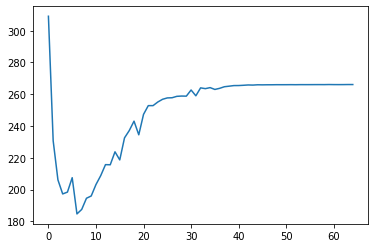

In [197]:
# lr = 0.1
plt.plot(train_losses)

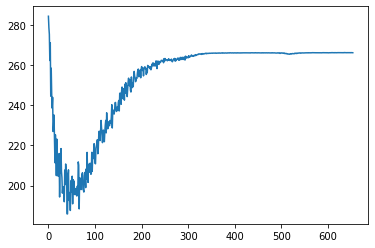

In [200]:
# lr 0.001
plt.plot(train_losses)

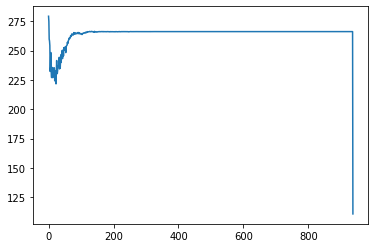

In [246]:
# lr 0.001 standardized clipped
plt.plot(train_losses)

In [245]:
train_losses = []

# initialize parameters
w1 = np.random.rand(input_size, hidden_size1)-0.5
b1 = np.random.rand(hidden_size1,)-0.5
w2 = np.random.rand(hidden_size1, hidden_size2)-0.5
b2 = np.random.rand(hidden_size2,)-0.5
w3 = np.random.rand(hidden_size2, output_size)-0.5
b3 = np.random.rand(output_size)-0.5

for e in range(n_epochs):
  for batch_idx, (data, target) in enumerate(train_loader):
      data = torch.flatten(data, start_dim=1).cpu().detach().numpy()
      # standardize
      data = (data - np.mean(data))/np.std(data)
      target = target.cpu().detach().numpy()
      # one hot encode
      oh_y_true = np.zeros((target.size, output_size))
      oh_y_true[np.arange(target.size),target] = 1
      
      z1, a1, z2, a2, z3, a3 = forward(data, w1, b1, w2, b2, w3, b3)
      print('forward', np.sum(a3))
      if math.isnan(np.sum(a3)):
        print('end batch', batch_idx)
        break
      #print(a3)
      w1, b1, w2, b2, w3, b3 = backprop(a3, oh_y_true, w1,b1, w2, b2, w3, b3, a1, a2, z1, z2, data, learning_rate )
      print('back', w1, w2, w3)
      #print(sum(w1))
      curr_loss = loss(oh_y_true, a3)
      if curr_loss == np.nan:
        break
      train_losses.append(curr_loss)

      #print(curr_loss)

Streaming output truncated to the last 5000 lines.
   8.29534889]
 [ 0.16159247  9.03746131 -0.2202492  ...  9.57029607  8.27881083
   8.54040154]
 ...
 [ 0.35723515  8.96821653  0.08480524 ...  9.26551257  8.90032739
   8.96798611]
 [ 0.17949239  9.37245127 -0.42126424 ...  9.52123387  8.49252831
   8.91889106]
 [ 0.19665429  8.66569794  0.13410586 ...  9.50605438  8.91912475
   8.71604476]] [[-0.29659605  0.05298757  0.18608247 ...  0.04653523  0.4141177
  -0.13743885]
 [ 2.4392471   2.86089505  2.44376062 ...  3.28939449  2.43665333
   3.08185399]
 [-0.40891027  0.30616882  0.14431533 ...  0.08738784  0.07734289
   0.4942629 ]
 ...
 [ 2.29910901  3.33637628  2.87958578 ...  3.36250918  3.04140221
   2.56313114]
 [ 2.25278917  3.57530494  3.16831107 ...  2.44972008  2.31869788
   2.95617809]
 [ 2.98925761  3.1519075   3.02451699 ...  3.10507787  2.09274592
   2.75085979]]
forward 10.000000000000005
back [[-3958.53401231 -4001.70276544 -3959.48126933 ... -3997.31971851
  -3984.7746900

## Pytorch

In [247]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1,hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)
        self.sigmoid = nn.Sigmoid
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = torch.sigmoid(x)
        x = self.fc2(x)
        x = torch.sigmoid(x)
        x = self.fc3(x)
        x = self.softmax(x)
        return x

In [272]:
network = Net()
optimizer = optim.SGD(network.parameters(), lr=0.001, momentum=0)
loss_func = nn.NLLLoss()

In [273]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [287]:
# train

for e in range(20):
    for batch_idx, (data, target) in enumerate(train_loader):
      data = torch.flatten(data, start_dim=1)
      #print(data.shape)
      output = network(data)
      optimizer.zero_grad()
      loss = F.nll_loss(output, target)
      loss.backward()
      optimizer.step()
      if batch_idx % log_interval == 0:
        #print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        #  e, batch_idx * len(data), len(train_loader.dataset),
        #  100. * batch_idx / len(train_loader), loss.item()))
        train_losses.append(loss.item())
        train_counter.append((batch_idx*64) + ((n_epochs-1)*len(train_loader.dataset)))
        #torch.save(network.state_dict(), '/results/model.pth')
        #torch.save(optimizer.state_dict(), '/results/optimizer.pth')

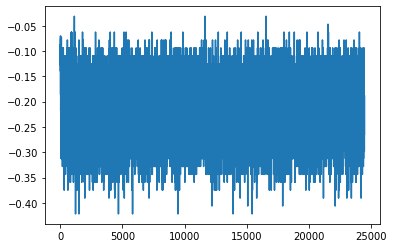

In [288]:
plt.plot(train_losses)

In [289]:
# test
network.eval()
test_loss = 0
correct = 0
preds = []
with torch.no_grad():
  for data, target in test_loader:
    data = torch.flatten(data, start_dim=1)
    output = network(data)
    #print(target.shape)
    test_loss += F.nll_loss(output, target, size_average=False).item()
    #print('test_loss', test_loss)
    pred = output.data.max(1, keepdim=True)[1]
    #print(pred)
    preds.extend(pred.cpu().detach().numpy())
    correct += pred.eq(target.data.view_as(pred)).sum()
test_loss /= len(test_loader.dataset)
test_losses.append(test_loss)
#print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
#  test_loss, correct, len(test_loader.dataset),
#  100. * correct / len(test_loader.dataset)))

/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [290]:
correct, test_loss

(tensor(2138), -0.2138)

In [267]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [291]:
y_test = []
for data, target in test_loader:
  y_test.extend(target.cpu().detach().numpy())

In [292]:
accuracy_score(y_test, preds)

0.1067

In [286]:
confusion_matrix(y_test, preds)

array([[  0, 342,   0,   0,   0,   0,   0, 638,   0,   0],
       [  0, 391,   0,   0,   0,   0,   0, 744,   0,   0],
       [  0, 354,   0,   0,   0,   0,   0, 678,   0,   0],
       [  0, 384,   0,   0,   0,   0,   0, 626,   0,   0],
       [  0, 327,   0,   0,   0,   0,   0, 655,   0,   0],
       [  0, 308,   0,   0,   0,   0,   0, 584,   0,   0],
       [  0, 325,   0,   0,   0,   0,   0, 633,   0,   0],
       [  0, 341,   0,   0,   0,   0,   0, 687,   0,   0],
       [  0, 354,   0,   0,   0,   0,   0, 620,   0,   0],
       [  0, 339,   0,   0,   0,   0,   0, 670,   0,   0]])